# Project's Goal

The purpose is to create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, the goal is to determine what it takes to be one of the best tennis players in the world.

## Data

The data `tennis_stats.csv` is from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). 

The data provided in the file is from the top 1500 ranked players in the ATP over the span of 2009 to 2017. 

The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.

## Data columns

### Identifying Data

* `Player`: name of the tennis player.
* `Year`: year data was recorded.

### Service Game Columns (Offensive)

* `Aces`: number of serves by the player where the receiver does not touch the ball.
* `DoubleFaults`: number of times player missed both first and second serve attempts.
* `FirstServe`: % of first-serve attempts made.
* `FirstServePointsWon`: % of first-serve attempt points won by the player.
* `SecondServePointsWon`: % of second-serve attempt points won by the player.
* `BreakPointsFaced`: number of times where the receiver could have won service game of the player.
* `BreakPointsSaved`: % of the time the player was able to stop the receiver from winning service game when they had the chance.
* `ServiceGamesPlayed`: total number of games where the player served.
* `ServiceGamesWon`: total number of games where the player served and won.
* `TotalServicePointsWon`: % of points in games where the player served that they won.

### Return Game Columns (Defensive)

* `FirstServeReturnPointsWon`: % of opponents first-serve points the player was able to win.
* `SecondServeReturnPointsWon`: % of opponents second-serve points the player was able to win.
* `BreakPointsOpportunities`: number of times where the player could have won the service game of the opponent.
* `BreakPointsConverted`: % of the time the player was able to win their opponent’s service game when they had the chance.
* `ReturnGamesPlayed`: total number of games where the player’s opponent served.
* `ReturnGamesWon`: total number of games where the player’s opponent served and the player won.
* `ReturnPointsWon`: total number of points where the player’s opponent served and the player won.
* `TotalPointsWon`: % of points won by the player.

### Outcomes

* `Wins`: number of matches won in a year.
* `Losses`: number of matches lost in a year.
* `Winnings`: total winnings in USD in a year.
* `Ranking`: ranking at the end of year.

In [1]:
# Importing the libraries and modules

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Loading the data

df = pd.read_csv("data/tennis_stats.csv")
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


### Exploratory Data Analysis

In [3]:
# Checking the columns in the dataset

df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

In [4]:
# Summary statistics
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


### Correlation between features

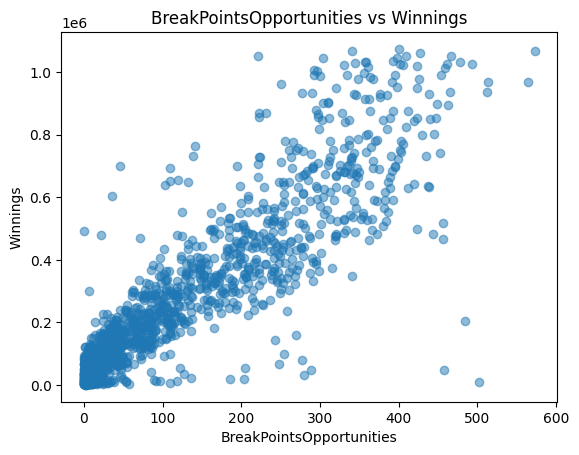

In [5]:
y = df["Winnings"]
x = df["BreakPointsOpportunities"]
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')
plt.scatter(x,y, alpha = 0.5)
plt.show();

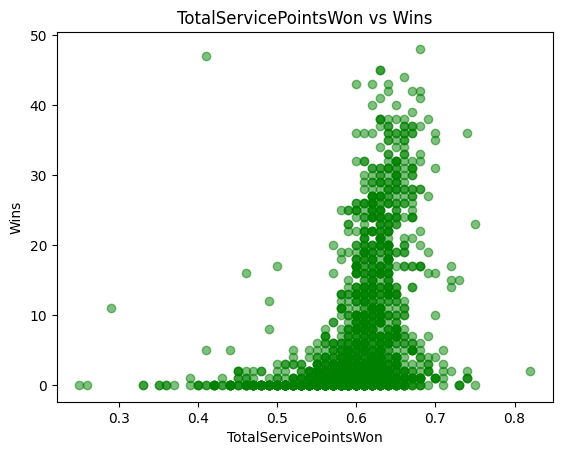

In [6]:
plt.title('TotalServicePointsWon vs Wins')
plt.scatter(df['TotalServicePointsWon'],df['Wins'], alpha = 0.5,color = 'green')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Wins')
plt.show();

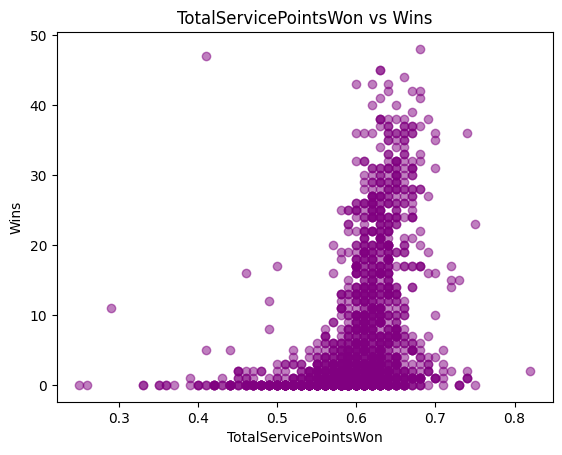

In [7]:
plt.scatter(df['TotalServicePointsWon'],df['Wins'], alpha = 0.5,color = 'purple')
plt.title('TotalServicePointsWon vs Wins')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Wins')
plt.show()

### Single feature linear regression models

In [8]:
# Using the FirstServeReturnPointsWon as a feature

feature = df[["FirstServeReturnPointsWon"]]
outcome = df[["Winnings"]]

In [9]:
# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(feature, outcome, train_size=0.8, test_size=0.2)

In [10]:
# Setting up the model
model_lr = LinearRegression()

# Fitting the model
model_sf_one = model_lr.fit(X_train, y_train)

# Using the model to get a prediction
y_prediction_one = model_lr.predict(X_test)


print("Model Score: ")
print(model_lr.score(X_test, y_test))

Model Score: 
0.05354985349286856


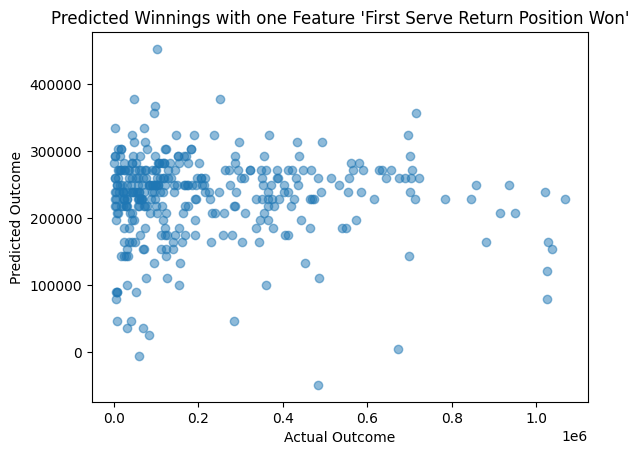

In [25]:
plt.title("Predicted Winnings with one Feature 'First Serve Return Position Won'")
plt.scatter(y_test,y_prediction_one, alpha = 0.5)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.show()

In [11]:
# Using the ServiceGamesPlayed as a feature

x_feature = df[["ServiceGamesPlayed"]]
outcome = df[["Winnings"]]

In [12]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_feature, outcome, train_size=0.8, test_size=0.2)

In [13]:
# Setting up the model
model_lr = LinearRegression()

# Fitting the model
model_sf_two = model_lr.fit(X_train, y_train)

# Using the model to get a prediction
y_prediction_two = model_lr.predict(X_test)


print("Model Score: ")
print(model_lr.score(X_test, y_test))

Model Score: 
0.832092193500289


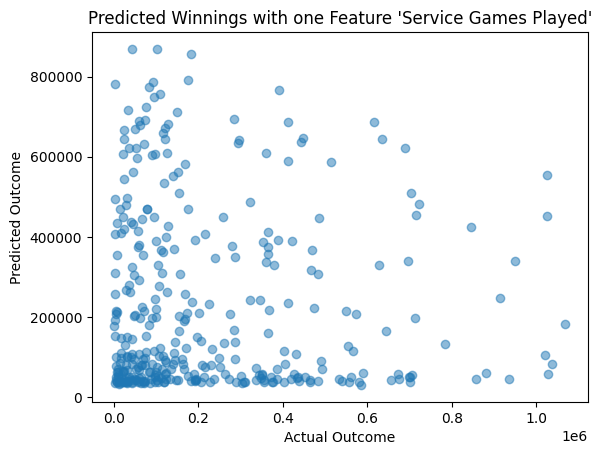

In [26]:
plt.title("Predicted Winnings with one Feature 'Service Games Played'")
plt.scatter(y_test,y_prediction_two, alpha = 0.5)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.show()

### Two features linear regression models

In [29]:
# Using BreakPointsOpportunities and FirstServeReturnPointsWon as features

features = df[["BreakPointsOpportunities",'FirstServeReturnPointsWon']]
outcomes = df[["Winnings"]]

In [30]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, train_size=0.8, test_size=0.2)

In [31]:
# Setting up the model
model_lr = LinearRegression()

# Fitting the model
my_model = model_lr.fit(X_train, y_train)

# Using the model to get a prediction
y_prediction_one = model_lr.predict(X_test)


print("Model Score: ")
print(model_lr.score(X_test, y_test))

Model Score: 
0.8282371053878195


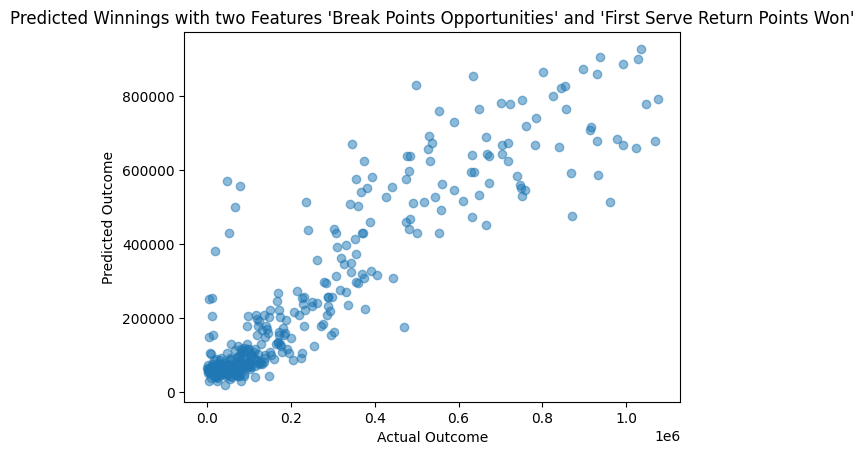

In [32]:
plt.title("Predicted Winnings with two Features 'Break Points Opportunities' and 'First Serve Return Points Won'")
plt.scatter(y_test,y_prediction_one, alpha = 0.5)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.show()

In [17]:
# Using BreakPointsOpportunities and ServiceGamesPlayed as features

x_features = df[["BreakPointsOpportunities",'ServiceGamesPlayed']]
y_outcome = df[["Winnings"]]

In [18]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_features, y_outcome, train_size=0.8, test_size=0.2)

In [19]:
# Setting up the model
model_lr = LinearRegression()

# Fitting the model
my_model = model_lr.fit(X_train, y_train)

# Using the model to get a prediction
y_prediction = model_lr.predict(X_test)


print("Model Score: ")
print(model_lr.score(X_test, y_test))

Model Score: 
0.8461196623761145


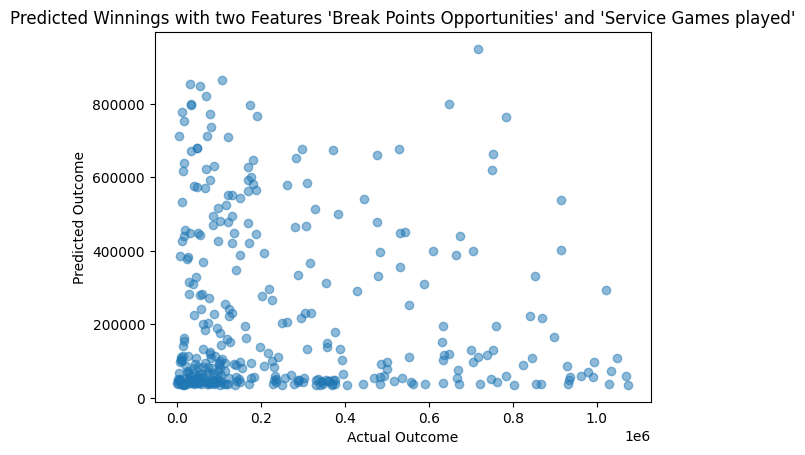

In [33]:
plt.title("Predicted Winnings with two Features 'Break Points Opportunities' and 'Service Games played'")
plt.scatter(y_test,y_prediction, alpha = 0.5)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.show()

### Multiple features linear regression models

In [20]:
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = df[['Winnings']]

In [21]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, outcome, train_size=0.8, test_size=0.2)

In [22]:
# Setting up the model
model_lr = LinearRegression()

# Fitting the model
model = model_lr.fit(X_train, y_train)

# Using the model to get a prediction
y_pred = model_lr.predict(X_test)


print("Model Score: ")
print(model_lr.score(X_test, y_test))

Model Score: 
0.8821364546839247


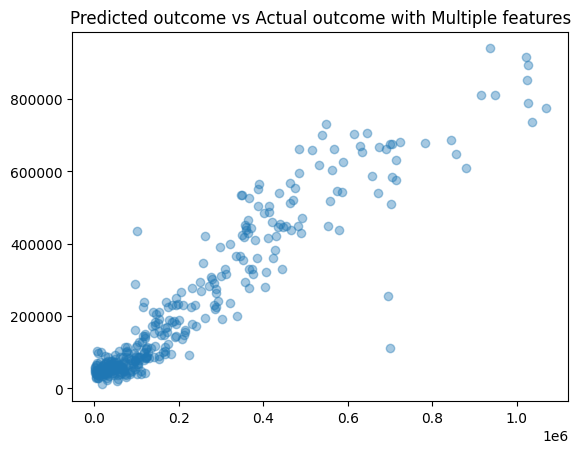

In [23]:
plt.title("Predicted Winnings with multiple Features" 'Break Points Opportunities' and 'Service Games played'")
plt.scatter(y_test,y_prediction, alpha = 0.5)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.show()